In [1]:
import matplotlib.pyplot as mpl
import matplotlib.font_manager
from matplotlib.patches import Circle

import numpy as np

rng = np.random.default_rng(1)

In [17]:
def gaussian(x, mu, std):
    return np.exp( - (x-mu)**2 / (2*std**2/4))

def half_gaussian(x, mu, std):
    results = np.zeros_like(x)
    results[x<mu] = np.exp( - (x[x<mu]-mu)**2 / (2*std**2/4))
    results[x>=mu] = np.exp( - (x[x>=mu]-mu)**2 / (2*std**2))
    return results

def gaussian_2d(mu, std):
    x, y = np.meshgrid(np.linspace(0,1,50), np.linspace(0,1,50))
    d = np.sqrt((x-mu)**2+(y-mu)**2/(5))
    g = 100 * np.exp(-( d/ ( 2.0 * std**2 ) ) )
    return rng.poisson(g)


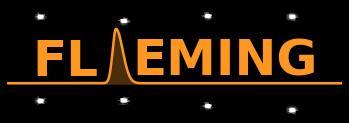

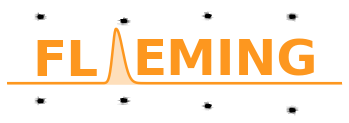

In [26]:
bg_color = "black"
fg_color = "#fd971f"
fig, ax = mpl.subplots(figsize=(6,2))
fig_w, ax_w  = mpl.subplots(figsize=(6,2))

n = 4
x_pos = np.linspace(0,1,n+1)
for i in range(n):
    mu = 0.5
    g = gaussian_2d(mu, 0.08).astype(np.float32)
    g = np.ma.masked_less_equal(g , 0.0001*np.amax(g))

    xc = x_pos[i] + 0.1
    yc = rng.uniform(0.05,0.2)
    yc2 = rng.uniform(0.8,0.95)

    w = 0.2
    ax.imshow(g, extent=(xc-w,xc+w,yc-w,yc+w), cmap="gray", vmax=0.5*np.amax(g), aspect="auto")
    ax.imshow(g, extent=(xc-w,xc+w,yc2-w,yc2+w), cmap="gray", vmax=0.5*np.amax(g), aspect="auto")
    ax_w.imshow(g, extent=(xc-w,xc+w,yc-w,yc+w), cmap="gray_r", vmax=0.5*np.amax(g), aspect="auto")
    ax_w.imshow(g, extent=(xc-w,xc+w,yc2-w,yc2+w), cmap="gray_r", vmax=0.5*np.amax(g), aspect="auto")


t_start = 0.075
# with mpl.xkcd():
for eixo in [ax, ax_w]:
    eixo.text(t_start,0.5, "FL", weight="bold",color = fg_color, fontsize=50,va="center")
    eixo.text(t_start+0.3,0.5, "EMING", weight="bold",color = fg_color, fontsize=50, va="center")

    l = np.linspace(0,1,1000)
    l_start = 0.3
    g_line = half_gaussian(l,t_start+ 0.25 ,0.02)/2 + l_start 
    eixo.plot(l, g_line, color = fg_color)
    eixo.fill_between(l, l_start-0.01, g_line, color=fg_color, alpha=0.3, lw=0)


    eixo.set_xlim(0,1)
    eixo.set_ylim(0,1)
    for side in ["left","right","top","bottom"]:
        eixo.spines[side].set_visible(False)
    eixo.grid(False)
    eixo.tick_params(which="both", left=False, bottom=False, labelleft=False, labelbottom =False)

ax.set_facecolor(bg_color)
fig.set_facecolor(bg_color)

fig.savefig("../assets/logo.png")
fig_w.savefig("../assets/logo_white.png")

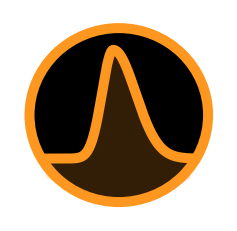

In [25]:
bg_color = "black"
fg_color = "#fd971f"
fig, ax = mpl.subplots(figsize=(4,4))

xc = 0.5 
crad = 0.4

ax.add_artist(
    Circle((xc,0.5), radius = crad, lw=10, fill=True, facecolor=bg_color, edgecolor=fg_color)
)

l = np.linspace(0.17,0.82,1000)
l_start = 0.3

c_line = np.sqrt((l-xc)**2+crad**2) - l_start
g_line = half_gaussian(l,t_start+ 0.4 ,0.1)/2 + l_start 
ax.plot(l, g_line, color = fg_color, lw=10)
ax.fill_between(l, c_line, g_line, color=fg_color, lw=0, alpha=0.2, zorder=10)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
for side in ["left","right","top","bottom"]:
    ax.spines[side].set_visible(False)
ax.grid(False)
ax.tick_params(which="both", left=False, bottom=False, labelleft=False, labelbottom =False)


ax.patch.set_alpha(0.0)
# fig.set_facecolor(None)

fig.savefig("../assets/icon.png", dpi=100)